# Proyecto sprint 7

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

### Abre el archivo de datos y estudia la información general 

In [1]:
#Cargar liberías 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
#Cargar archivo del DataFrame
df_company=pd.read_csv('moved_project_sql_result_01.csv')
df_location=pd.read_csv('moved_project_sql_result_04.csv')
df_weather=pd.read_csv('moved_project_sql_result_07.csv')

In [3]:
#Preparar los datos
df_company.info()
df_location.info()
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

In [4]:
display(df_company.sample(6))
display(df_location.sample(6))
display(df_weather.sample(6))

,company_name,trips_amount
61,5874 - 73628 Sergey Cab Corp.,5
19,Chicago Medallion Leasing INC,1607
36,3591 - 63480 Chuks Cab,37
53,5006 - 39261 Salifu Bawa,14
49,5074 - 54002 Ahzmi Inc,16
2,Medallion Leasin,10367


,dropoff_location_name,average_trips
25,Irving Park,296.566667
43,Mckinley Park,64.033333
34,Humboldt Park,97.866667
39,Jefferson Park,74.333333
70,Wrigleyville,14.233333
16,Logan Square,620.333333


,start_ts,weather_conditions,duration_seconds
994,2017-11-11 08:00:00,Good,1365.0
637,2017-11-11 14:00:00,Good,2400.0
752,2017-11-04 06:00:00,Good,1532.0
403,2017-11-11 14:00:00,Good,2400.0
730,2017-11-11 13:00:00,Good,2280.0
577,2017-11-04 17:00:00,Bad,2580.0


In [5]:
#Convertimos 'start_ts' a formato fecha 
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])

#Verificamos los cambios
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [6]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
df_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
df_weather.describe()

,start_ts,duration_seconds
count,1068,1068.000000
mean,2017-11-11 11:53:12.134831360,2071.731273
min,2017-11-04 00:00:00,0.000000
25%,2017-11-04 15:00:00,1438.250000
50%,2017-11-11 09:00:00,1980.000000
75%,2017-11-18 05:00:00,2580.000000
max,2017-11-25 23:00:00,7440.000000
std,NaN,769.461125


In [9]:
print("Valores duplicados en df_company:",df_company.duplicated().sum())
print()
print("Valores duplicados en df_location:",df_location.duplicated().sum())
print()
print("Valores duplicados en df_weather:",df_weather.duplicated().sum())
print()
# Marcar filas duplicadas
duplicados = df_weather[df_weather.duplicated()]

# Filtrar el DataFrame original usando las filas marcadas como duplicadas
valores_duplicados = df_weather[df_weather.duplicated(keep=False)]

print("Valores duplicados en df_weather:")
print(valores_duplicados)

Valores duplicados en df_company: 0

Valores duplicados en df_location: 0

Valores duplicados en df_weather: 197

Valores duplicados en df_weather:
                start_ts weather_conditions  duration_seconds
4    2017-11-11 07:00:00               Good            1440.0
8    2017-11-11 14:00:00               Good            2460.0
10   2017-11-18 06:00:00               Good            1500.0
16   2017-11-04 12:00:00               Good            2640.0
23   2017-11-04 14:00:00               Good            3360.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[312 rows x 3 columns]


<div class="alert alert-block alert-info">
<b>Los DataFrame df_company y df_location no presentan valores duplicados sin embargo el df_weather si. Se realiza una inspección para saber cuáles son esos valores, podemos notar que son valores necesarios para el análisis y desarrollo del problema, por consiguiente no se eliminaran los valores.</b> <a class="tocSkip"></a>
</div>

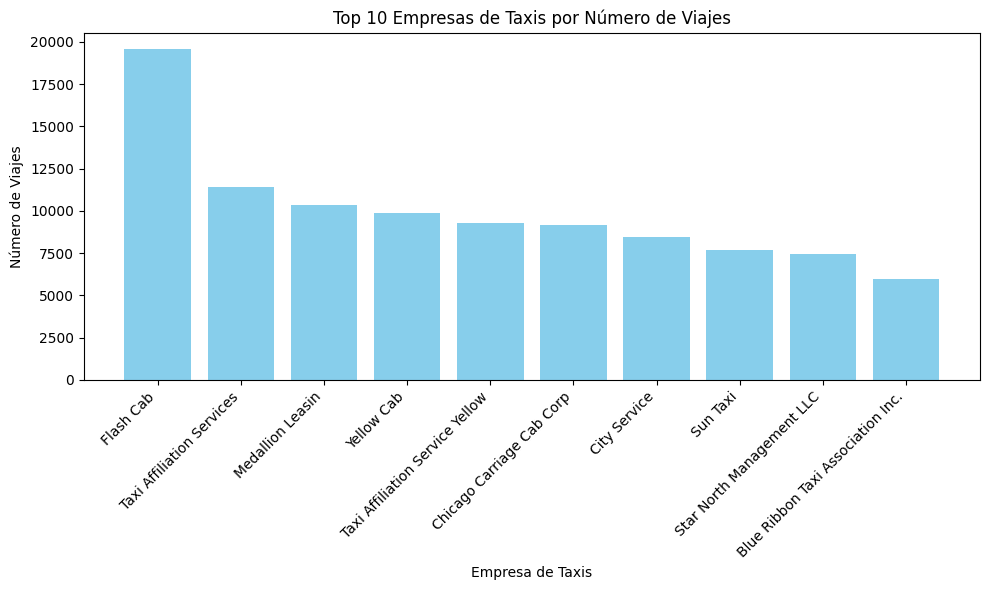

Tabla de empresas de taxis y número de viajes:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


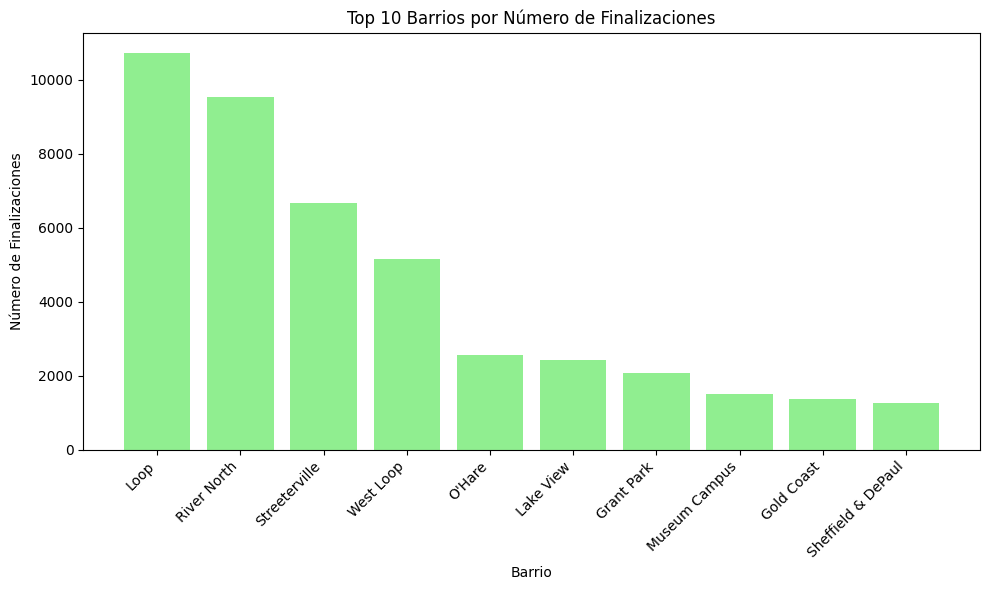

Tabla de los 10 barrios principales por número de finalizaciones:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [10]:
# Grafico de empresas de taxis y número de viajes
top_10_companies = df_company.nlargest(10, 'trips_amount')
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='skyblue')
plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabla de empresas de taxis y número de viajes
print("Tabla de empresas de taxis y número de viajes:")
print(top_10_companies)

# Gráfico de los 10 barrios principales por número de finalizaciones
top_10_locations = df_location.nlargest(10, 'average_trips')
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations['dropoff_location_name'], top_10_locations['average_trips'], color='lightgreen')
plt.title('Top 10 Barrios por Número de Finalizaciones')
plt.xlabel('Barrio')
plt.ylabel('Número de Finalizaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tabla de los 10 barrios principales por número de finalizaciones
print("Tabla de los 10 barrios principales por número de finalizaciones:")
print(top_10_locations)

### Conclusiones

Para el gráfico de empresas y taxis y númedo de viajes:
 
    * Observamos que la empresa 'Flash Cab' tiene un número significativamente mayor de viajes en comparación con otras.
    * Podemos identificar claramente las empresas más populares en términos de número y viajes, lo que puede indicar su popularidad entre los usuarios o su presenia en áreas de alta demanda. 
    * Con la gráfica podemos tomar decisiones comerciales, como por ejemplo oportunidad para promocionar o mejorar la disponibilidad respecto a la competencia.

Gráfico de los 10 barrios principales por número de finalizaciones:

    * Podemos observar que el barrio 'Loop, River North y Streeterville' son los barrios más frecuentes como destinos finales de los viajes en taxi.
    * Estos barrios probablemente sean áreas de alta actividad comercial, turística o residencial, lo que genera una mayor demanda de servicio de taxi.
    * El gráfico puede ser útil para planificar estrategias de transporte, optimizar su distribución de vehículos y mejorar la disponibilidad de servicio en las áreas con alta demanda. 
    

### Prueba de Hipótesis

Proponemos la hipótesis nula y alternativa:

Hipótesis Nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [11]:

# Filtrar los datos para obtener solo los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
df_loop_to_ohare = df_location[df_location['dropoff_location_name'] == "Aeropuerto Internacional O'Hare"]

# Obtener las fechas de los sábados lluviosos
rainy_saturdays = df_weather[(df_weather['start_ts'].dt.dayofweek == 5) & (df_weather['weather_conditions'] == 'Bad')]

# Obtener las duraciones de los viajes para los sábados lluviosos
rainy_saturdays_durations = df_weather[df_weather['start_ts'].isin(rainy_saturdays['start_ts'])]['duration_seconds']

# Obtener las duraciones de los viajes para los sábados no lluviosos
non_rainy_saturdays_durations = df_weather[(df_weather['start_ts'].dt.dayofweek == 5) & (df_weather['weather_conditions'] != 'Bad')]['duration_seconds']

# Realizar una prueba t de muestras independientes
t_statistic, p_value = stats.ttest_ind(rainy_saturdays_durations, non_rainy_saturdays_durations, equal_var=False)

# Imprimir el valor t
print("Valor t:", t_statistic)

# Definir el nivel de significancia
alpha = 0.05

# Imprimir los resultados
print("Valor p:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia en sábados lluviosos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en sábados lluviosos.")

Valor t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula.
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia en sábados lluviosos.


Se usa t de dos muestras para comparar medias de dos grupos independientes. Ya que en este caso queremos comparar clasificaciones promedio de usuarios para os géneros de Acción y Deportes. El valor p resultante es demasiado pequeño, lo que indica que hay evidecia significativa en contra de la hipótesis nula. Dado que el valor p es menor que el nivel de significancia alfa = 0.05, se rechaza la hipótesis nula en favor de la hipótesis alternativa. Por lo tanto se rechaza la idea de que las calificaciones promedio son igauales para ambos géneros. 
